In [4]:
import numpy as np
pi=np.pi
#
import matplotlib.pyplot as plt
import matplotlib as mpl

In [5]:
import phasr as phr

In [6]:
phr.__version__

'0.3.1.dev0+gea06a1e.d20250207'

# Nuclei

In [7]:
# Coulomb
nucleus_coulomb = phr.nucleus('Al27_coulomb',Z=13,A=27)

In [5]:
# Fourier Bessel
ai_Al27=np.array([0.43418e-1,0.60298e-1,0.28950e-2,-0.23522e-1,-0.79791e-2,0.23010e-2,0.10794e-2,0.12574e-3,-0.13021e-3,0.56563e-4,-0.18011e-4,0.42869e-5])
nucleus_FB = phr.nucleus('Al27_FB',Z=13,A=27,ai=ai_Al27,R=7)

In [6]:
# Fermi (2 parameter)
nucleus_2pF = phr.nucleus('Al27_2pF',Z=13,A=27,c=3.07,z=0.519)
nucleus_2pF.fill_gaps()

data loaded from  ./tmp/nucleus_splines/electric_field_Al27_2pFfermi2p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/electric_potential_Al27_2pFfermi2p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/form_factor_Al27_2pFfermi2p_x=0.0-1000.0-1.0.txt


In [7]:
# Gauss
nucleus_gauss = phr.nucleus('Al27_gauss',Z=13,A=27,b=2.48)

In [8]:
# Uniform
nucleus_uni = phr.nucleus('Al27_uni',Z=13,A=27,rc=3.92)

In [9]:
# oszillator basis (shell model)
Cs_M00_Al27=np.array([27, -11.3343, 0.837814])
Cs_M01_Al27=np.array([2*13-27, 0.666696, -0.0858552])
Cs_Phipp00_Al27=np.array([-4.98975 , 0.997985])
Cs_Phipp01_Al27=np.array([0.303398 , -0.0606814])
Ci_dict_Al27={'M00':Cs_M00_Al27,'M01':Cs_M01_Al27,'Phipp00':Cs_Phipp00_Al27,'Phipp01':Cs_Phipp01_Al27}
nucleus_osz = phr.nucleus('Al27_osz',Z=13,A=27,Ci_dict=Ci_dict_Al27)

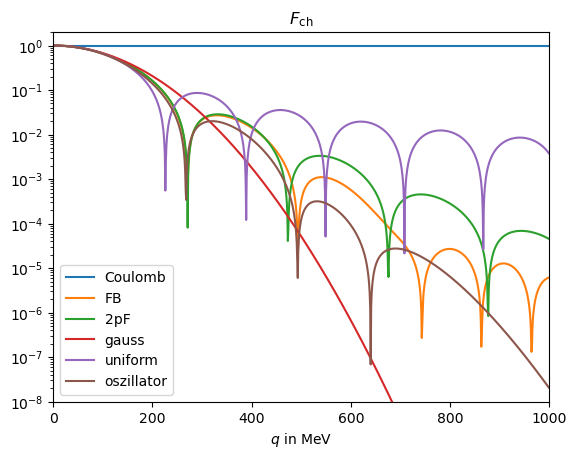

In [10]:
q=np.arange(1,1000,1.)
plt.plot(q,np.abs(nucleus_coulomb.form_factor(q)),label='Coulomb')
plt.plot(q,np.abs(nucleus_FB.form_factor(q)),label='FB')
plt.plot(q,np.abs(nucleus_2pF.form_factor(q)),label='2pF')
plt.plot(q,np.abs(nucleus_gauss.form_factor(q)),label='gauss')
plt.plot(q,np.abs(nucleus_uni.form_factor(q)),label='uniform')
plt.plot(q,np.abs(nucleus_osz.form_factor(q)),label='oszillator')
plt.title(r'$F_\operatorname{ch}$')
plt.xlabel(r'$q$ in MeV')
plt.ylim(1e-8,2)
plt.xlim(0,1000)
plt.yscale('log')
plt.legend()
plt.show()

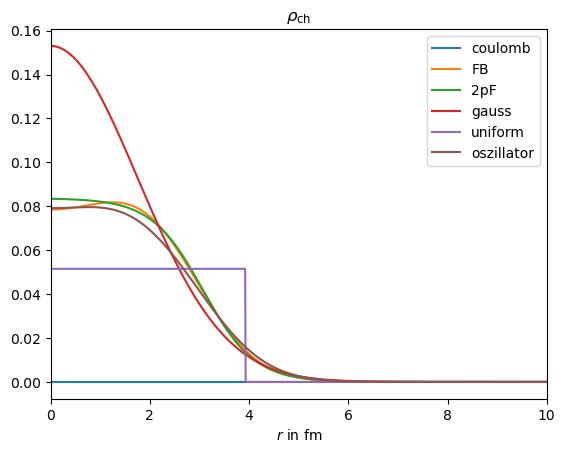

In [11]:
r=np.arange(0,10,1e-2)
plt.plot(r,nucleus_coulomb.charge_density(r),label='coulomb')
plt.plot(r,nucleus_FB.charge_density(r),label='FB')
plt.plot(r,nucleus_2pF.charge_density(r),label='2pF')
plt.plot(r,nucleus_gauss.charge_density(r),label='gauss')
plt.plot(r,nucleus_uni.charge_density(r),label='uniform')
plt.plot(r,nucleus_osz.charge_density(r),label='oszillator')
plt.xlim(0,10)
plt.title(r'$\rho_\operatorname{ch}$')
plt.xlabel(r'$r$ in fm')
plt.legend()
plt.show()

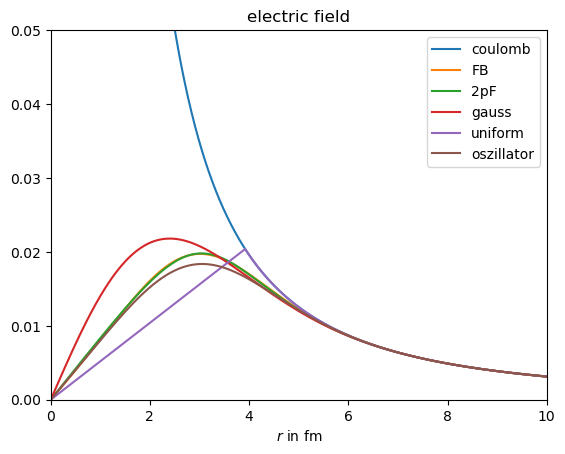

In [12]:
r=np.arange(1e-2,10,1e-2)
plt.plot(r,nucleus_coulomb.electric_field(r),label='coulomb')
plt.plot(r,nucleus_FB.electric_field(r),label='FB')
plt.plot(r,nucleus_2pF.electric_field(r),label='2pF')
plt.plot(r,nucleus_gauss.electric_field(r),label='gauss')
plt.plot(r,nucleus_uni.electric_field(r),label='uniform')
plt.plot(r,nucleus_osz.electric_field(r),label='oszillator')
plt.xlim(0,10)
plt.ylim(0,0.05)
plt.title(r'electric field')
plt.xlabel(r'$r$ in fm')
plt.legend()
plt.show()

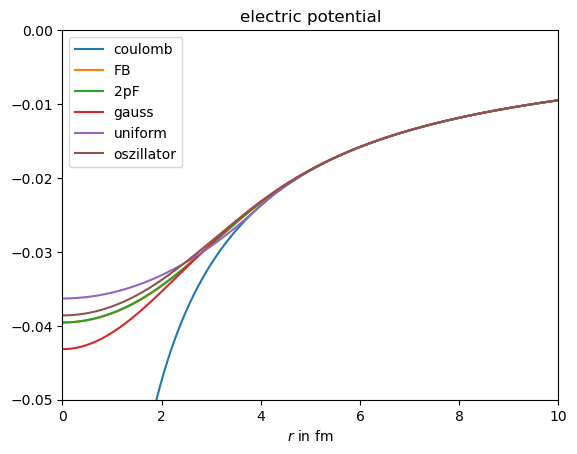

In [13]:
r=np.arange(1e-2,10,1e-2)
plt.plot(r,nucleus_coulomb.electric_potential(r),label='coulomb')
plt.plot(r,nucleus_FB.electric_potential(r),label='FB')
plt.plot(r,nucleus_2pF.electric_potential(r),label='2pF')
plt.plot(r,nucleus_gauss.electric_potential(r),label='gauss')
plt.plot(r,nucleus_uni.electric_potential(r),label='uniform')
plt.plot(r,nucleus_osz.electric_potential(r),label='oszillator')
plt.ylim(-0.05,0)
plt.xlim(0,10)
plt.title(r'electric potential')
plt.xlabel(r'$r$ in fm')
plt.legend()
plt.show()

## References

In [14]:
nuclei={}
previous = ('',0,0)
for (name,A,Z) in phr.nuclei.references.onfile:
    if previous != (name,A,Z):
        nucleus = phr.nuclei.references.load_reference_nucleus(Z=Z,A=A)
        counter = 1
        if type(nucleus)==list:
            for nucleus_i in nucleus:
                nuclei[name+'_ref'+str(counter)] = nucleus_i
                counter+=1
        else:
            nuclei[name+'_ref'+str(counter)] = nucleus
        previous = (name,A,Z)

Warning total charge for 3H_ref1 deviates more than 1e-4: Z=1, Q=1.0002810143193803
Warning total charge for 6Li_ref1 deviates more than 1e-4: Z=3, Q=2.9911703492816275
Warning total charge for 10B_ref1 deviates more than 1e-4: Z=5, Q=5.040468192885473
Warning total charge for 29Si_ref1 deviates more than 1e-4: Z=14, Q=14.001434049773936
Warning total charge for 40Ca_ref1 deviates more than 1e-4: Z=20, Q=20.002089287743296
Warning total charge for 50Cr_ref1 deviates more than 1e-4: Z=24, Q=24.00248143324518
Warning total charge for 52Cr_ref1 deviates more than 1e-4: Z=24, Q=24.00245254849756
Warning total charge for 60Ni_ref3 deviates more than 1e-4: Z=28, Q=28.9582230093977
Warning total charge for 64Ni_ref1 deviates more than 1e-4: Z=28, Q=27.93996979272232
Warning total charge for 70Zn_ref1 deviates more than 1e-4: Z=30, Q=30.003077098365168
Warning total charge for 92Zr_ref1 deviates more than 1e-4: Z=40, Q=40.004050805777794
Warning total charge for 144Sm_ref1 deviates more than 1

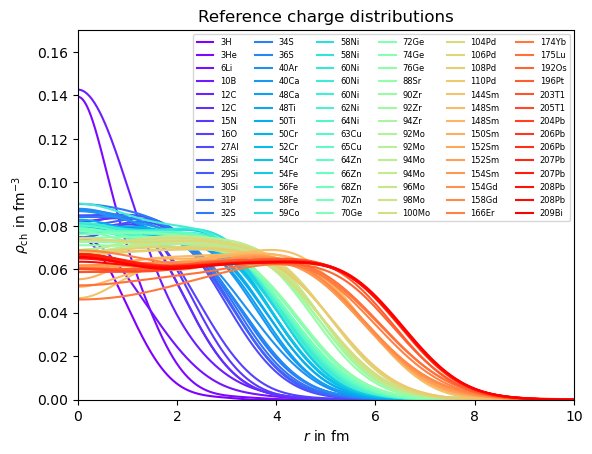

In [15]:
N=len(nuclei)
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.rainbow(np.linspace(0,1,N))) #mpl.cycler(color=["r", "k", "c"]) 

r=np.arange(0,12,1e-2)
for nucleus_name in nuclei:
    nucleus = nuclei[nucleus_name]
    plt.plot(r,nucleus.charge_density(r),label=nucleus_name[:-5])
plt.xlim(0,10)
plt.ylim(0,0.17)
plt.title(r'Reference charge distributions')
plt.ylabel(r'$\rho_\operatorname{ch}$ in fm$^{-3}$')
plt.xlabel(r'$r$ in fm')
plt.legend(loc='upper right',fontsize=6,ncol=6)
plt.show()

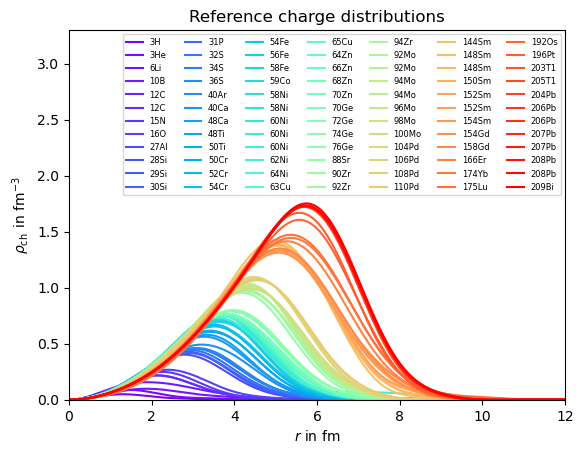

In [17]:
N=len(nuclei)
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.rainbow(np.linspace(0,1,N))) #mpl.cycler(color=["r", "k", "c"]) 

r=np.arange(0,15,1e-2)
for nucleus_name in nuclei:
    nucleus = nuclei[nucleus_name]
    plt.plot(r,r**2*nucleus.charge_density(r),label=nucleus_name[:-5])
plt.xlim(0,12)
plt.ylim(0,3.3)
plt.title(r'Reference charge distributions')
plt.ylabel(r'$\rho_\operatorname{ch}$ in fm$^{-3}$')
plt.xlabel(r'$r$ in fm')
plt.legend(loc='upper right',fontsize=6,ncol=7)
plt.show()

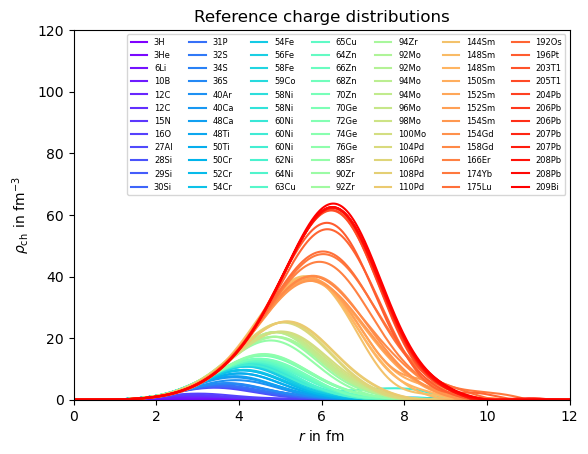

In [18]:
N=len(nuclei)
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.rainbow(np.linspace(0,1,N))) #mpl.cycler(color=["r", "k", "c"]) 

r=np.arange(0,15,1e-2)
for nucleus_name in nuclei:
    nucleus = nuclei[nucleus_name]
    plt.plot(r,r**4*nucleus.charge_density(r),label=nucleus_name[:-5])
plt.xlim(0,12)
plt.ylim(0,120)
plt.title(r'Reference charge distributions')
plt.ylabel(r'$\rho_\operatorname{ch}$ in fm$^{-3}$')
plt.xlabel(r'$r$ in fm')
plt.legend(loc='upper right',fontsize=6,ncol=7)
plt.show()

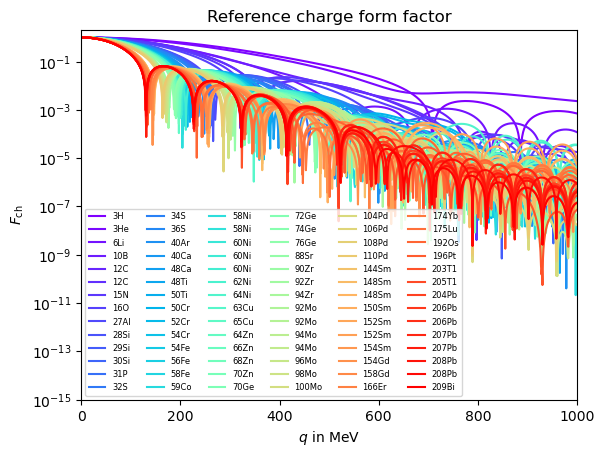

In [19]:
N=len(nuclei)
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.rainbow(np.linspace(0,1,N))) #mpl.cycler(color=["r", "k", "c"]) 

q=np.arange(1,1000,1.)
for nucleus_name in nuclei:
    nucleus = nuclei[nucleus_name]
    plt.plot(q,np.abs(nucleus.form_factor(q)),label=nucleus_name[:-5])
plt.ylim(1e-15,2)
plt.xlim(0,1000)
plt.title(r'Reference charge form factor')
plt.yscale('log')
plt.ylabel(r'$F_\operatorname{ch}$')
plt.xlabel(r'$q$ in MeV')
plt.legend(loc='lower left',fontsize=6,ncol=6)
plt.show()

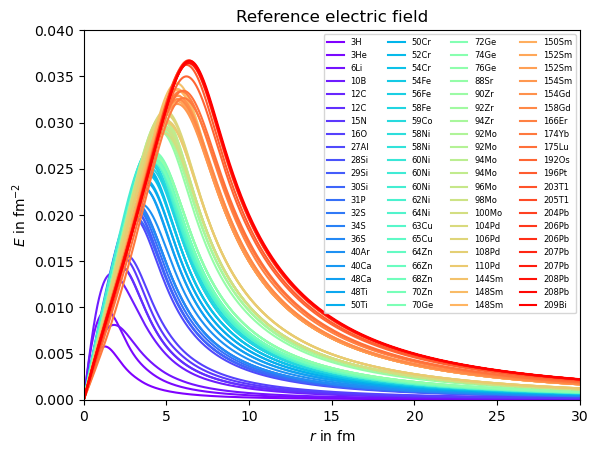

In [20]:
N=len(nuclei)
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.rainbow(np.linspace(0,1,N))) #mpl.cycler(color=["r", "k", "c"]) 

r=np.arange(0,30,1e-2)
for nucleus_name in nuclei:
    nucleus = nuclei[nucleus_name]
    plt.plot(r,nucleus.electric_field(r),label=nucleus_name[:-5])
plt.xlim(0,30)
plt.ylim(0,0.04)
plt.title(r'Reference electric field')
plt.ylabel(r'$E$ in fm$^{-2}$')
plt.xlabel(r'$r$ in fm')
plt.legend(loc='upper right',fontsize=6,ncol=4)
plt.show()

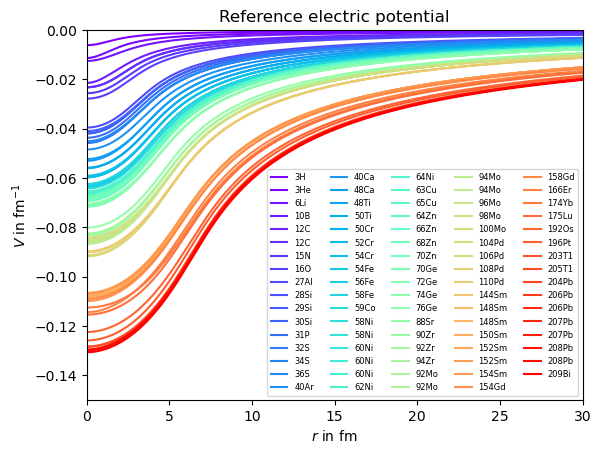

In [21]:
N=len(nuclei)
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.rainbow(np.linspace(0,1,N))) #mpl.cycler(color=["r", "k", "c"]) 

r=np.arange(0,30,1e-2)
for nucleus_name in nuclei:
    nucleus = nuclei[nucleus_name]
    plt.plot(r,nucleus.electric_potential(r),label=nucleus_name[:-5])
plt.ylim(-0.15,0)
plt.xlim(0,30)
plt.title(r'Reference electric potential')
plt.ylabel(r'$V$ in fm$^{-1}$')
plt.xlabel(r'$r$ in fm')
plt.legend(loc='lower right',fontsize=6,ncol=5)
plt.show()

# Boundstates

In [17]:
# Fourier Bessel
ai_Al27=np.array([0.43418e-1,0.60298e-1,0.28950e-2,-0.23522e-1,-0.79791e-2,0.23010e-2,0.10794e-2,0.12574e-3,-0.13021e-3,0.56563e-4,-0.18011e-4,0.42869e-5])
nucleus_Al27 = phr.nucleus('Al27_FB',Z=13,A=27,ai=ai_Al27,R=7)

In [18]:
boundstates_l0_Al27 = phr.boundstates(nucleus_Al27,kappa=-1,lepton_mass=phr.masses.mmu) 
print('E_1s=',boundstates_l0_Al27.energy_levels[0],'MeV') 

E_1s= -0.4650383801521656 MeV


C:\Users\Frederic\anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\Frederic\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


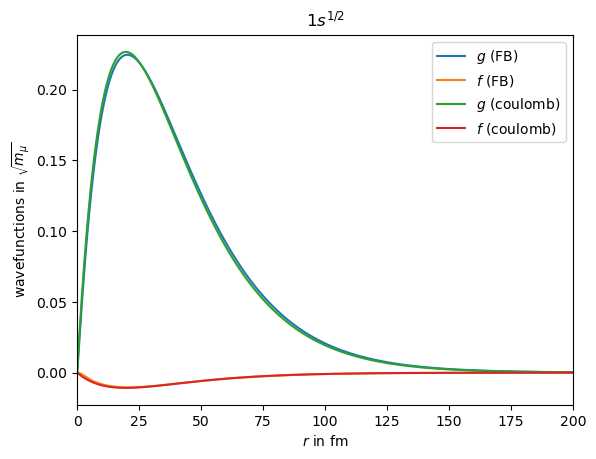

In [19]:
r=np.arange(0,200,0.1)

plt.plot(r,boundstates_l0_Al27.wavefunction_g_1s12(r),label=r'$g$ (FB)')
plt.plot(r,boundstates_l0_Al27 .wavefunction_f_1s12(r),label=r'$f$ (FB)')

f_c=lambda r: phr.nuclei.parameterizations.coulomb.f_coulomb_nk(r,n=1,kappa=-1,Z=13,mass=phr.masses.mmu)/np.sqrt(phr.masses.mmu)
g_c=lambda r: phr.nuclei.parameterizations.coulomb.g_coulomb_nk(r,n=1,kappa=-1,Z=13,mass=phr.masses.mmu)/np.sqrt(phr.masses.mmu)
plt.plot(r,g_c(r),label=r'$g$ (coulomb)')
plt.plot(r,f_c(r),label=r'$f$ (coulomb)')

plt.title(r'$1s^{1/2}$')
plt.xlim(0,200)
plt.xlabel(r'$r$ in fm')
plt.ylabel(r'wavefunctions in $\sqrt{m_\mu}$')
plt.legend()

#plt.ylim(-1e0,1e0)

In [20]:
boundstates_l0_Al27.find_next_solution() 
print('E_2s=',boundstates_l0_Al27.energy_levels[1],'MeV') 

E_2s= -0.11774970562665743 MeV


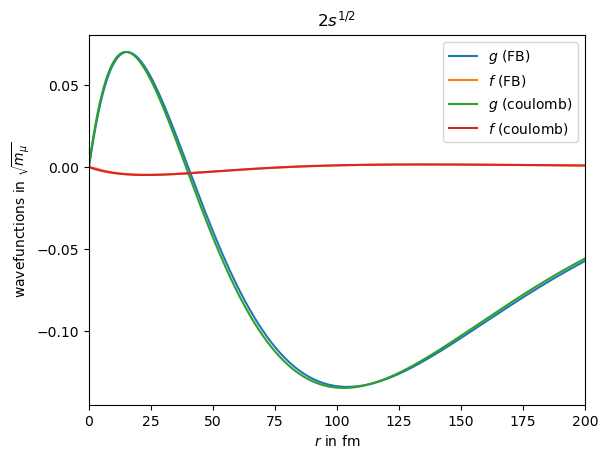

In [21]:
r=np.arange(0,200,0.1)

plt.plot(r,boundstates_l0_Al27.wavefunction_g_2s12(r),label=r'$g$ (FB)')
plt.plot(r,boundstates_l0_Al27 .wavefunction_f_2s12(r),label=r'$f$ (FB)')

f_c=lambda r: phr.nuclei.parameterizations.coulomb.f_coulomb_nk(r,n=2,kappa=-1,Z=13,mass=phr.masses.mmu)/np.sqrt(phr.masses.mmu)
g_c=lambda r: phr.nuclei.parameterizations.coulomb.g_coulomb_nk(r,n=2,kappa=-1,Z=13,mass=phr.masses.mmu)/np.sqrt(phr.masses.mmu)
plt.plot(r,g_c(r),label=r'$g$ (coulomb)')
plt.plot(r,f_c(r),label=r'$f$ (coulomb)')

plt.title(r'$2s^{1/2}$')
plt.xlim(0,200)
plt.xlabel(r'$r$ in fm')
plt.ylabel(r'wavefunctions in $\sqrt{m_\mu}$')
plt.legend()

#plt.ylim(-1e0,1e0)

In [22]:
boundstates_l1_Al27 = phr.boundstates(nucleus_Al27,kappa=+1,lepton_mass=phr.masses.mmu) 
print('E_2p12=',boundstates_l1_Al27.energy_levels[0],'MeV') 

E_2p12= -0.11921144660932725 MeV


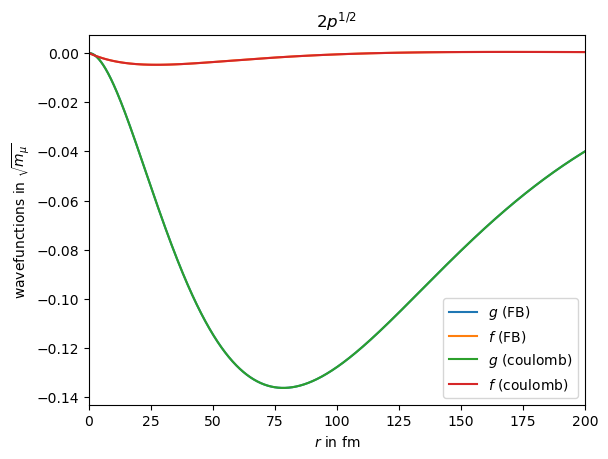

In [23]:
r=np.arange(0,200,0.1)

plt.plot(r,boundstates_l1_Al27.wavefunction_g_2p12(r),label=r'$g$ (FB)')
plt.plot(r,boundstates_l1_Al27 .wavefunction_f_2p12(r),label=r'$f$ (FB)')

f_c=lambda r: phr.nuclei.parameterizations.coulomb.f_coulomb_nk(r,n=2,kappa=+1,Z=13,mass=phr.masses.mmu)/np.sqrt(phr.masses.mmu)
g_c=lambda r: phr.nuclei.parameterizations.coulomb.g_coulomb_nk(r,n=2,kappa=+1,Z=13,mass=phr.masses.mmu)/np.sqrt(phr.masses.mmu)
plt.plot(r,g_c(r),label=r'$g$ (coulomb)')
plt.plot(r,f_c(r),label=r'$f$ (coulomb)')

plt.title(r'$2p^{1/2}$')
plt.xlim(0,200)
plt.xlabel(r'$r$ in fm')
plt.ylabel(r'wavefunctions in $\sqrt{m_\mu}$')
plt.legend()

#plt.ylim(-1e0,1e0)

# Continuumstates

In [24]:
# Fourier Bessel
ai_Al27=np.array([0.43418e-1,0.60298e-1,0.28950e-2,-0.23522e-1,-0.79791e-2,0.23010e-2,0.10794e-2,0.12574e-3,-0.13021e-3,0.56563e-4,-0.18011e-4,0.42869e-5])
nucleus_Al27 = phr.nucleus('Al27_FB',Z=13,A=27,ai=ai_Al27,R=7)

In [25]:
continuumstates_l0_Al27 = phr.continuumstates(nucleus_Al27,kappa=-1,energy=250)
continuumstates_l0_Al27.solve_IVP()

(0.0, 50.0)

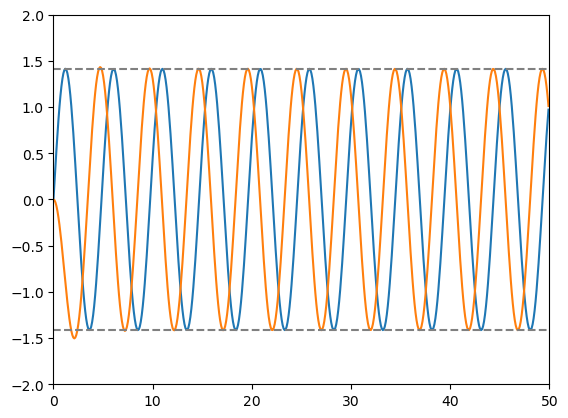

In [26]:
r=np.arange(0,50,0.1)
plt.plot(r,continuumstates_l0_Al27.wavefct_g(r))
plt.plot(r,continuumstates_l0_Al27.wavefct_f(r))
plt.plot(r,r*0+np.sqrt(2),color='gray',linestyle='--')
plt.plot(r,r*0-np.sqrt(2),color='gray',linestyle='--')
plt.ylim(-2,2)
plt.xlim(0,50)

In [27]:
continuumstates_l1_Al27 = phr.continuumstates(nucleus_Al27,kappa=+1,energy=250)
continuumstates_l1_Al27.solve_IVP()

(0.0, 50.0)

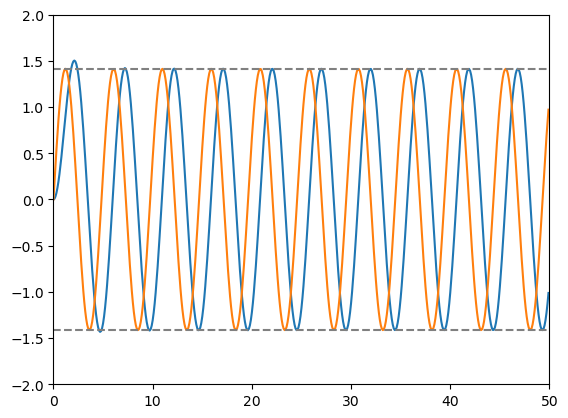

In [28]:
r=np.arange(0,50,0.1)
plt.plot(r,continuumstates_l1_Al27.wavefct_g(r))
plt.plot(r,continuumstates_l1_Al27.wavefct_f(r))
plt.plot(r,r*0+np.sqrt(2),color='gray',linestyle='--')
plt.plot(r,r*0-np.sqrt(2),color='gray',linestyle='--')
plt.ylim(-2,2)
plt.xlim(0,50)

# Crosssection

In [4]:
ai_48Ti=np.array([0.03392,0.05913,0.01547,-0.02550,-0.0152,0.0029,0.0037])
R_48Ti=9.25
nucleus_48Ti = phr.nucleus('48Ti_FB',Z=22,A=48,ai=ai_48Ti,R=R_48Ti)

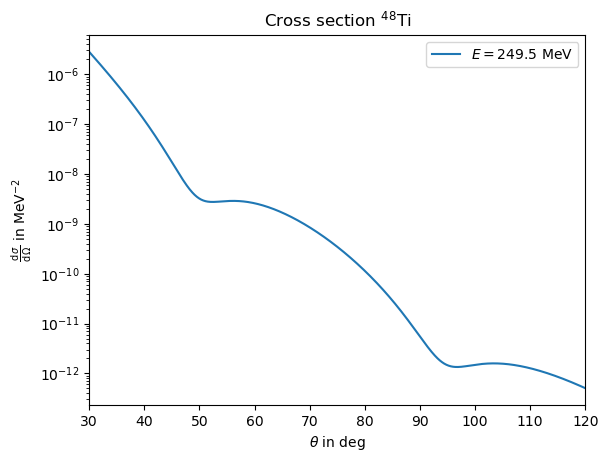

In [5]:
energy=249.5
theta=np.arange(30,120,1e-1)
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_48Ti),label=r'$E=249.5~$MeV')
plt.yscale('log')
plt.title(r"Cross section $^{48}$Ti")
plt.xlabel(r"$\theta$ in deg")
plt.ylabel(r"$\frac{\operatorname{d}\sigma}{\operatorname{d}\Omega}$ in MeV$^{-2}$")
plt.legend()
plt.xlim(30,120)
plt.show()

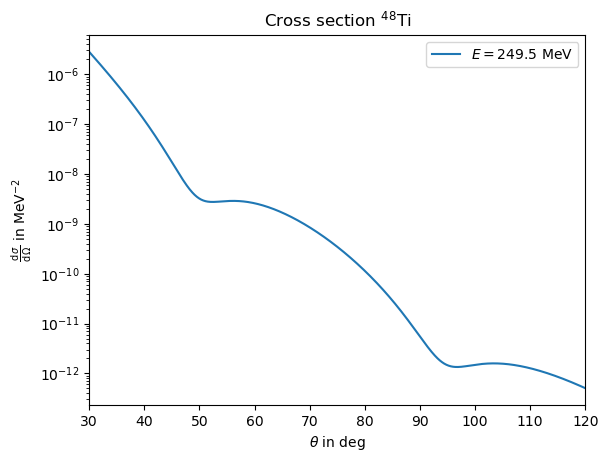

In [9]:
energy=249.5
theta=np.arange(30,120,1e-1)
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_48Ti,N_processes=30),label=r'$E=249.5~$MeV')
plt.yscale('log')
plt.title(r"Cross section $^{48}$Ti")
plt.xlabel(r"$\theta$ in deg")
plt.ylabel(r"$\frac{\operatorname{d}\sigma}{\operatorname{d}\Omega}$ in MeV$^{-2}$")
plt.legend()
plt.xlim(30,120)
plt.show()

In [10]:
## assess necessary precision # takes a long time, but enables fastest possible evaluation once these are set
# Uncomment to run again (>5min)
energy=249.5
theta=np.arange(30,120,1e-1)
args=phr.optimise_crosssection_precision(energy,theta*pi/180,nucleus_48Ti,crosssection_precision=1e-2)

new best: {'method': 'DOP853', 'N_partial_waves': 170, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 0.0}
time: 2.181000232696533 diff: 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 170, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-15}
time: 2.035973072052002 diff: 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 170, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-14}
time: 1.892399549484253 diff: 6.176643319446042e-11
new best: {'method': 'DOP853', 'N_partial_waves': 170, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-13}
time: 1.8871309757232666 diff: 6.176643319446042e-11
new best: {'method': 'DOP853', 'N_partial_waves': 170, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-12}
time: 1.7632954120635986 diff: 4.3700699833093057e-10
new best: {'method': 'DOP853', 'N_partial_wav

In [11]:
# results of the upper call:
args = {'method': 'DOP853', 'N_partial_waves': 25, 'atol': 1e-06, 'rtol': 1e-07, 'energy_norm': 0.01973269804, 'phase_difference_limit': 1e-06}

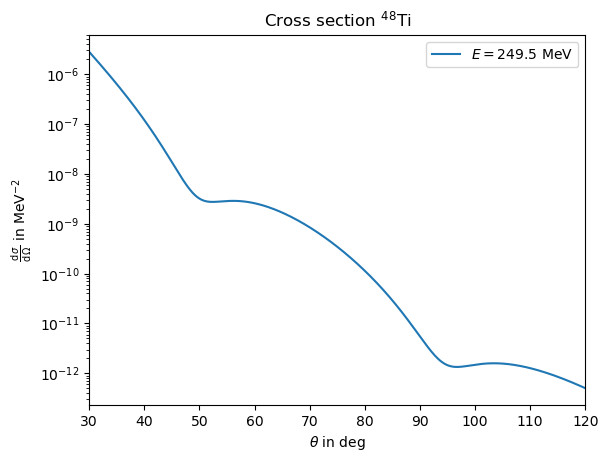

In [12]:
energy=249.5
theta=np.arange(30,120,1e-1)
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_48Ti,**args),label=r'$E=249.5~$MeV')
plt.yscale('log')
plt.title(r"Cross section $^{48}$Ti")
plt.xlabel(r"$\theta$ in deg")
plt.ylabel(r"$\frac{\operatorname{d}\sigma}{\operatorname{d}\Omega}$ in MeV$^{-2}$")
plt.legend()
plt.xlim(30,120)
plt.show()

In [13]:
args_PVES={
    'N_partial_waves' : 150,
    'atol' : 1e-13,
    'rtol' : 1e-13,
    'phase_difference_limit' : 0,
}

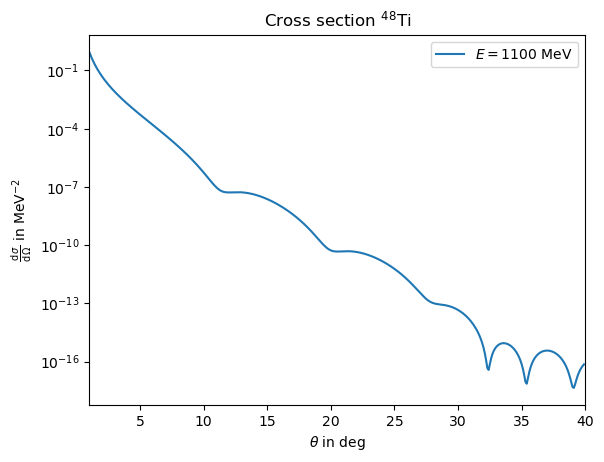

In [14]:
energy=1100
theta=np.arange(1,40,1e-1)
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_48Ti,**args_PVES),label=r'$E=1100~$MeV')
plt.yscale('log')
plt.title(r"Cross section $^{48}$Ti")
plt.xlabel(r"$\theta$ in deg")
plt.ylabel(r"$\frac{\operatorname{d}\sigma}{\operatorname{d}\Omega}$ in MeV$^{-2}$")
plt.legend()
plt.xlim(1,40)
plt.show()

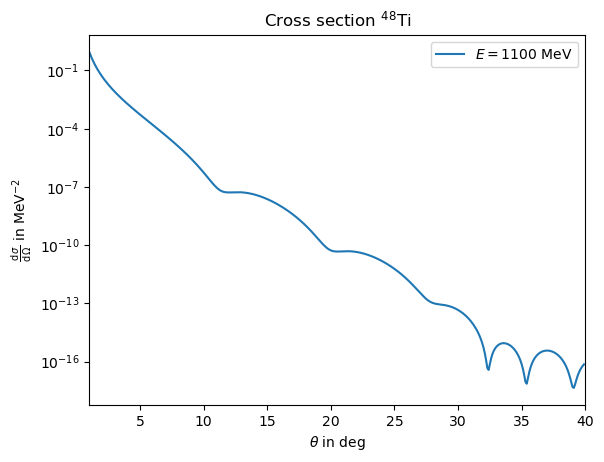

In [15]:
energy=1100
theta=np.arange(1,40,1e-1)
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_48Ti,N_processes=30,**args_PVES),label=r'$E=1100~$MeV')
plt.yscale('log')
plt.title(r"Cross section $^{48}$Ti")
plt.xlabel(r"$\theta$ in deg")
plt.ylabel(r"$\frac{\operatorname{d}\sigma}{\operatorname{d}\Omega}$ in MeV$^{-2}$")
plt.legend()
plt.xlim(1,40)
plt.show()

In [16]:
## assess necessary precision # takes a long time, but enables fastest possible evaluation once these are set
# Uncomment to run again (>15min)
energy=1100
theta=np.arange(3,10,1e-1)
args_PVES_opt=phr.optimise_crosssection_precision(energy,theta*pi/180,nucleus_48Ti,crosssection_precision=1e-9,N_processes=30)

new best: {'method': 'DOP853', 'N_partial_waves': 170, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 0.0}
time: 20.244731426239014 diff: 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 170, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-15}
time: 20.371234893798828 diff: 3.8049965788201764e-14
new best: {'method': 'DOP853', 'N_partial_waves': 170, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-11}
time: 17.861156940460205 diff: 2.3136326363534494e-10
new best: {'method': 'DOP853', 'N_partial_waves': 170, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 19.732698040000002, 'phase_difference_limit': 1e-11}
time: 17.76270890235901 diff: 2.328545860060649e-10
new best: {'method': 'DOP853', 'N_partial_waves': 170, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 1.973269804, 'phase_difference_limit': 1e-11}
time: 17.442519426345825 diff: 2.3239154263391023e-10
new best: {'meth

In [10]:
args_PVES_opt = {'method': 'DOP853', 'N_partial_waves': 150, 'atol': 1e-10, 'rtol': 1e-12, 'energy_norm': 0.1973269804, 'phase_difference_limit': 1e-11}

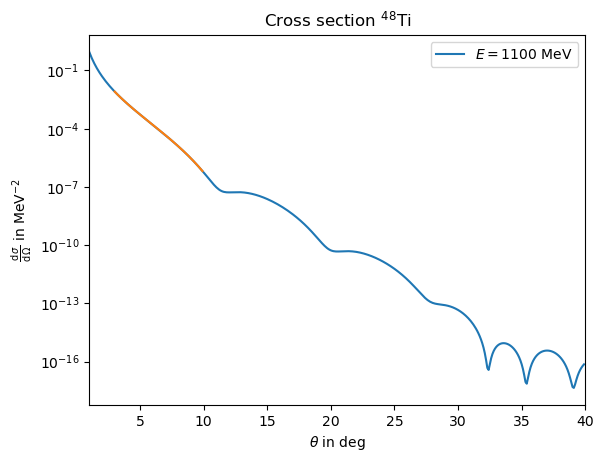

In [9]:
energy=1100
theta=np.arange(1,40,1e-1)
cross=phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_48Ti,**args_PVES_opt)
plt.plot(theta,cross,label=r'$E=1100~$MeV')
plt.plot(theta[np.logical_and(3<=theta,theta<=10)],cross[np.logical_and(3<=theta,theta<=10)])
plt.yscale('log')
plt.title(r"Cross section $^{48}$Ti")
plt.xlabel(r"$\theta$ in deg")
plt.ylabel(r"$\frac{\operatorname{d}\sigma}{\operatorname{d}\Omega}$ in MeV$^{-2}$")
plt.legend()
plt.xlim(1,40)
plt.show()

In [23]:
args_PVES_opt2 = {'method': 'DOP853', 'N_partial_waves': 150, 'atol': 1e-10, 'rtol': 1e-12, 'energy_norm': 0.1973269804, 'phase_difference_limit': 1e-11}

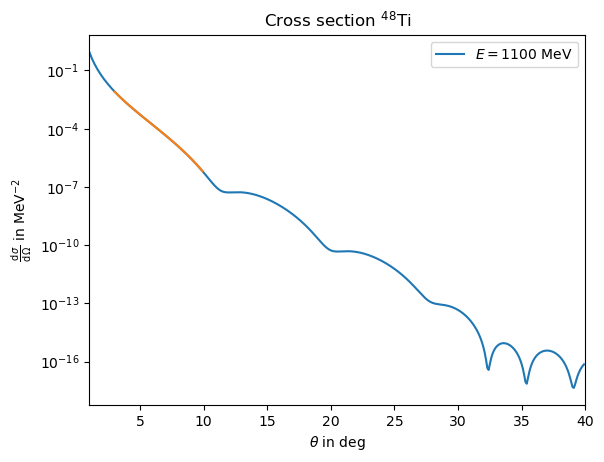

In [24]:
energy=1100
theta=np.arange(1,40,1e-1)
cross=phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_48Ti,**args_PVES_opt2)
plt.plot(theta,cross,label=r'$E=1100~$MeV')
plt.plot(theta[np.logical_and(3<=theta,theta<=10)],cross[np.logical_and(3<=theta,theta<=10)])
plt.yscale('log')
plt.title(r"Cross section $^{48}$Ti")
plt.xlabel(r"$\theta$ in deg")
plt.ylabel(r"$\frac{\operatorname{d}\sigma}{\operatorname{d}\Omega}$ in MeV$^{-2}$")
plt.legend()
plt.xlim(1,40)
plt.show()

In [7]:
args_PVES_opt_part = {'method': 'DOP853', 'atol': 1e-10, 'rtol': 1e-12, 'energy_norm': 0.1973269804, 'phase_difference_limit': 1e-11}

In [8]:
N_par_arr = np.arange(20,200,1)
theta=np.arange(3,10,1e-2)
cross_previous = phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_48Ti,N_partial_waves=19,**args_PVES_opt_part)
cross_diff_arr=np.array([])

for N_par in N_par_arr:
    print(N_par)
    cross_curr = phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_48Ti,N_partial_waves=N_par,**args_PVES_opt_part)
    cross_diff_arr = np.append(cross_diff_arr,np.max(np.abs(cross_curr-cross_previous)))
    cross_previous = cross_curr
    

20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


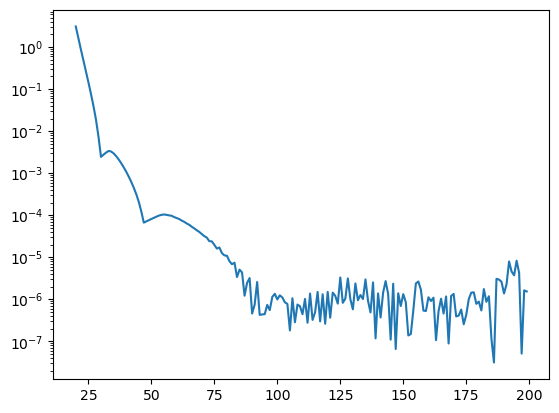

In [10]:
plt.plot(N_par_arr,cross_diff_arr)
plt.yscale('log')

In [ ]:
# for crosssection noise at level ~1e-6

In [ ]:
#>100 partialwellen nicht stabil/genau

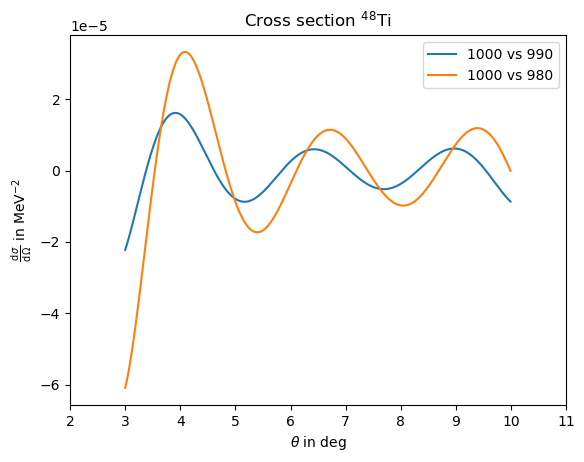

In [17]:
energy=1100
theta=np.arange(3,10,1e-2)
cross=phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_48Ti,N_partial_waves=150,**args_PVES_opt_part)
cross2=phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_48Ti,N_partial_waves=140,**args_PVES_opt_part)
cross3=phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_48Ti,N_partial_waves=130,**args_PVES_opt_part)
plt.plot(theta,(cross-cross2)/cross,label=r'diff1')
plt.plot(theta,(cross-cross3)/cross,label=r'diff2')
#plt.plot(theta[np.logical_and(3<=theta,theta<=10)],cross[np.logical_and(3<=theta,theta<=10)])
#plt.yscale('log')
plt.title(r"Cross section $^{48}$Ti")
plt.xlabel(r"$\theta$ in deg")
plt.ylabel(r"$\frac{\operatorname{d}\sigma}{\operatorname{d}\Omega}$ in MeV$^{-2}$")
plt.legend()
plt.xlim(2,11)
plt.show()

## Numerical

In [24]:
ai_48Ti=np.array([0.03392,0.05913,0.01547,-0.02550,-0.0152,0.0029,0.0037])
R_48Ti=9.25
N_48Ti=len(ai_48Ti)
qi_48Ti = np.arange(1,N_48Ti+1)*np.pi/R_48Ti
def rho_48Ti(r): return phr.nuclei.parameterizations.fourier_bessel.charge_density_FB(r,ai_48Ti,R_48Ti,qi_48Ti)
nucleus_48Ti_num = phr.nucleus('48Ti_num',Z=22,A=48,charge_density=rho_48Ti)

In [28]:
nucleus_48Ti_num.fill_gaps()

data loaded from  ./tmp/nucleus_splines/electric_field_48Ti_num_x=0.0-20.0-0.02.txt


In [29]:
nucleus_48Ti_num.set_electric_field_from_charge_density()
nucleus_48Ti_num.set_electric_potential_from_electric_field()

data loaded from  ./tmp/nucleus_splines/electric_field_48Ti_num_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/electric_potential_48Ti_num_x=0.0-20.0-0.02.txt


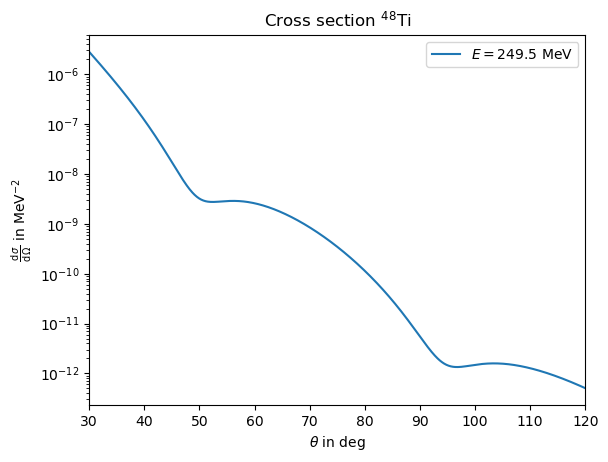

In [30]:
energy=249.5
theta=np.arange(30,120,1e-1)
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_48Ti_num),label=r'$E=249.5~$MeV')
plt.yscale('log')
plt.title(r"Cross section $^{48}$Ti")
plt.xlabel(r"$\theta$ in deg")
plt.ylabel(r"$\frac{\operatorname{d}\sigma}{\operatorname{d}\Omega}$ in MeV$^{-2}$")
plt.legend()
plt.xlim(30,120)
plt.show()

# Overlap integrals

In [9]:
# oszillator basis (shell model)
Cs_M00_Al27=np.array([27, -11.3343, 0.837814])
Cs_M01_Al27=np.array([2*13-27, 0.666696, -0.0858552])
Cs_Phipp00_Al27=np.array([-4.98975 , 0.997985])
Cs_Phipp01_Al27=np.array([0.303398 , -0.0606814])
Ci_dict_Al27={'M00':Cs_M00_Al27,'M01':Cs_M01_Al27,'Phipp00':Cs_Phipp00_Al27,'Phipp01':Cs_Phipp01_Al27}
nucleus_osz_Al27 = phr.nucleus('Al27_osz',Z=13,A=27,Ci_dict=Ci_dict_Al27)

In [10]:
phr.overlap_integral_dipole(nucleus_osz_Al27)

0.03457669819989159

In [42]:
phr.overlap_integral_scalar(nucleus_osz_Al27,'p')

0.015270087419182152

In [43]:
phr.overlap_integral_scalar(nucleus_osz_Al27,'n')

0.016248464648204435

In [44]:
phr.overlap_integral_vector(nucleus_osz_Al27,'p')

0.015829828311490206

In [45]:
phr.overlap_integral_vector(nucleus_osz_Al27,'n')

0.016856183792725972

# PVES

In [7]:
import matplotlib.pyplot as plt

In [8]:
ai_48Ti=np.array([0.03392,0.05913,0.01547,-0.02550,-0.0152,0.0029,0.0037])
R_48Ti=9.25
nucleus_48Ti_test0 = phr.nucleus('48Ti_FB',Z=22,A=48,ai=ai_48Ti,R=R_48Ti)
weak_charge_48Ti_test=nucleus_48Ti_test0.Qw
total_charge_48Ti_test=nucleus_48Ti_test0.total_charge
nucleus_48Ti_test = phr.nucleus('48Ti_FB',Z=22,A=48,ai=ai_48Ti,R=R_48Ti,ai_weak=weak_charge_48Ti_test/total_charge_48Ti_test*ai_48Ti,R_weak=R_48Ti)

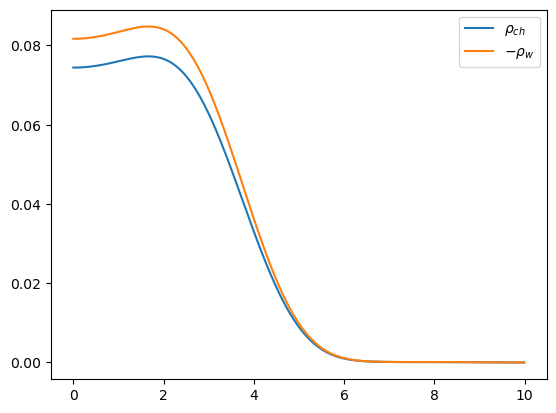

In [9]:
r=np.arange(0,10,1e-2)
plt.plot(r,nucleus_48Ti_test.charge_density(r),label=r'$\rho_{ch}$')
plt.plot(r,-nucleus_48Ti_test.weak_density(r),label=r'$-\rho_{w}$')
plt.legend()

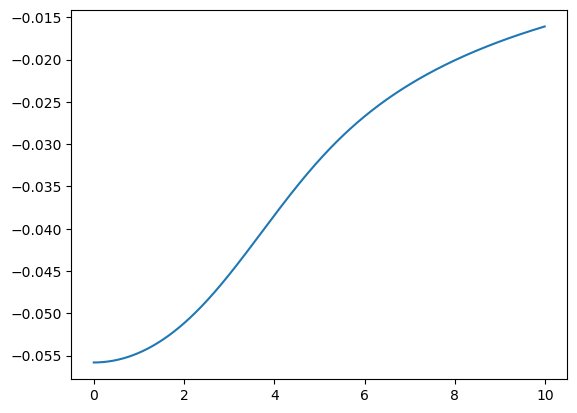

In [10]:
r=np.arange(0,10,1e-2)
plt.plot(r,nucleus_48Ti_test.electric_potential(r))

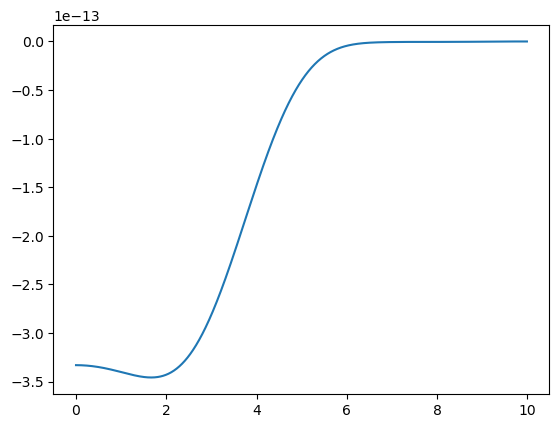

In [11]:
r=np.arange(0,10,1e-2)
plt.plot(r,nucleus_48Ti_test.weak_potential(r))

In [12]:
# change example !!!

In [13]:
args_PVES_opt = {'method': 'DOP853', 'atol': 1e-10, 'rtol': 1e-12, 'energy_norm': 0.1973269804, 'phase_difference_limit': 1e-11}

In [14]:
theta_deg=np.arange(4,10,1e-1)
E_MeV=1157
#
A_PV0 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,nucleus_48Ti_test,verbose=False,N_partial_waves=200,**args_PVES_opt)
A_PV1 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,nucleus_48Ti_test,verbose=False,N_partial_waves=100,**args_PVES_opt)
A_PV2 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,nucleus_48Ti_test,verbose=False,N_partial_waves=80,**args_PVES_opt)
#

KeyboardInterrupt: 

In [ ]:
plt.plot(theta_deg,A_PV0)
plt.plot(theta_deg,A_PV1)
plt.plot(theta_deg,A_PV2)

In [22]:
#Pb: 
q_Pb = np.sqrt(0.00616*1e6)
theta_Pb = 4.7*pi/180 #L: 4.71(2) R: 4.67(2)
print(q_Pb)
#Ca: 
q_Ca = np.sqrt(0.0297*1e6)
theta_Ca = 4.51*pi/180
print(q_Ca)
#Al:
q_Al = np.sqrt(0.02357*1e6)
theta_Al = 7.61*pi/180
print(q_Al)

78.48566748139433
172.33687939614086
153.52524222420234


In [25]:
#Pb:
#approx
print(q_Pb/(2*np.sin(theta_Pb/2)))
#approx
#Ca: 
#approx
print(q_Ca/(2*np.sin(theta_Ca/2)))
#Al:
#approx
print(q_Al/(2*np.sin(theta_Al/2)))

957.0550135868299
2189.961300796471
1156.7434233585843


## Old example nucleus

In [5]:
# oszillator basis (shell model)
Cs_M00_Al27=np.array([27, -11.3343, 0.837814])
Cs_M01_Al27=np.array([2*13-27, 0.666696, -0.0858552])
Cs_Phipp00_Al27=np.array([-4.98975 , 0.997985])
Cs_Phipp01_Al27=np.array([0.303398 , -0.0606814])
Ci_dict_Al27={'M00':Cs_M00_Al27,'M01':Cs_M01_Al27,'Phipp00':Cs_Phipp00_Al27,'Phipp01':Cs_Phipp01_Al27}
nucleus_osz_Al27 = phr.nucleus('Al27_osz',Z=13,A=27,Ci_dict=Ci_dict_Al27)

In [ ]:
# shell model is slow due to hyp1f1 implementation

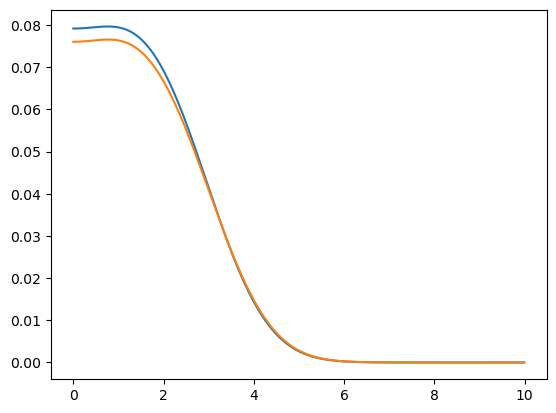

In [6]:
r=np.arange(0,10,1e-2)
plt.plot(r,nucleus_osz_Al27.charge_density(r))
plt.plot(r,-nucleus_osz_Al27.weak_density(r))

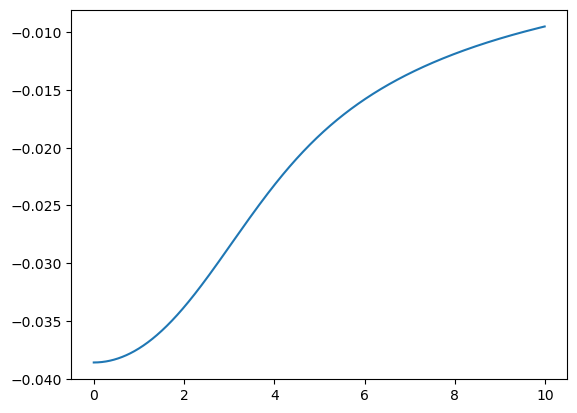

In [7]:
r=np.arange(0,10,1e-2)
plt.plot(r,nucleus_osz_Al27.electric_potential(r))

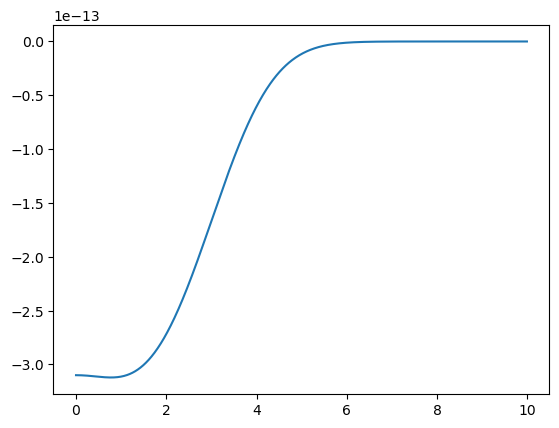

In [8]:
r=np.arange(0,10,1e-2)
plt.plot(r,nucleus_osz_Al27.weak_potential(r))